Download the data file above and read it into a pandas DataFrame.
Add the code necessary to describe the dataset
Using markdown commentary describe the dataset 
Conduct at least three EDA techniques on the dataset, include markdown commentary to describe what you are doing, why you are doing it and the results of each analysis
Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression model and display the output from the model
In addition to the model output include markdown commentary about the important statistics from the output; is taxes a good predictor for selling price? Why or why not?
Repeat this procedure using one of the other variables as the independent variable. Which model is "better"? What are some limitations of the model? 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [3]:
df = pd.read_csv('homes.csv')
df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sell     50 non-null     int64  
 1    List    50 non-null     int64  
 2    Living  50 non-null     int64  
 3    Rooms   50 non-null     int64  
 4    Beds    50 non-null     int64  
 5    Baths   50 non-null     int64  
 6    Age     50 non-null     int64  
 7    Acres   50 non-null     float64
 8    Taxes   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


In [5]:
df.describe()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


DESCRIBE THE DATASET: 
    

Correlation Analysis
Correlation analysis is conducted to understand the strength and direction of the linear relationship between two different variables. It compares all the variables in the dataset and the output helps us identify patterns and dependencies between different variables. The stronger correlations are closer to 1. 

The results show that there is a strong positive correlations between "Sell" and "List" "Sell" and "Taxes" and other positive correlations between "Sell" and "Living" and "Sell" and "Baths".

In [6]:
df.corr()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
Sell,1.000000,0.997433,0.879381,0.560425,0.335113,0.640059,-0.147343,0.168713,0.899339
List,0.997433,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
Living,0.879381,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
Rooms,0.560425,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
Beds,0.335113,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
Baths,0.640059,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
Age,-0.147343,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
Acres,0.168713,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
Taxes,0.899339,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


Box Plot 
We want to understand the distribution of the Sell column, and see if there are any outliers. Outliers can skew the results of statistical analyses and can also indicate errors in data collection, this is why we want to have them identified. Because Sell is our dependent variable, we want to understand what it looks like. 
We can see graphically bellow that there are some outliers, first some around 250 and 300, then a significant ooutlier around 600 (superior part of the box plot). 

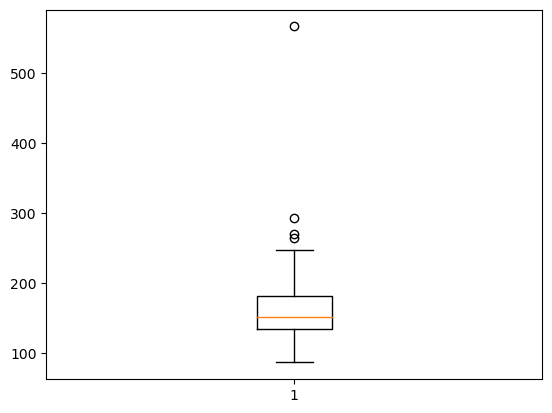

In [37]:
plt.boxplot(df['Sell']);

In [38]:
data = df.copy()

In [39]:
data_1 = data[data['Sell'] < 250]

What we did here was remove the outliers in Sell to look at the new descriptive statistics without it, and be able to understand our data frame

In [40]:
data_1.describe()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,154.826087,161.565217,19.565217,7.913043,3.739130,1.760870,31.260870,1.043261,3358.043478
std,35.536713,36.669486,5.040512,1.189324,0.612274,0.672798,31.847857,1.237593,740.830524
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,133.500000,140.000000,17.000000,7.000000,3.000000,1.000000,13.000000,0.365000,3070.000000
50%,150.500000,158.000000,19.000000,8.000000,4.000000,2.000000,24.500000,0.545000,3368.500000
75%,175.000000,183.750000,22.000000,8.000000,4.000000,2.000000,40.000000,1.182500,3780.000000
max,247.000000,252.000000,39.000000,12.000000,5.000000,3.000000,202.000000,6.490000,5158.000000


I checked the column names because the scatter plot wasn't working and I realized there is a space before every column which I have to add when I move forward. Understanding and knowing the column names is key for us to be able to execute the code we are trying to. 

In [16]:
columns = df.columns
print(columns)

Index(['Sell', ' List', ' Living', ' Rooms', ' Beds', ' Baths', ' Age',
       ' Acres', ' Taxes'],
      dtype='object')


Scatter Plot
We built a scatter plot to determine if there is a linear relationship between the Taxes and Sell columns. 
Using Taxes as our independent variable, we can see that it has a linear effect on the Sell output, but we can also identify that there is a spread in the scatterplot where all the dots are not in a tight straight line, but they still do follow a linear pattern which suggests a linear relationship between the variables. With scatterplots, you need to look at a visually clear pattern to understand if there is a linear relationship between the variables. 

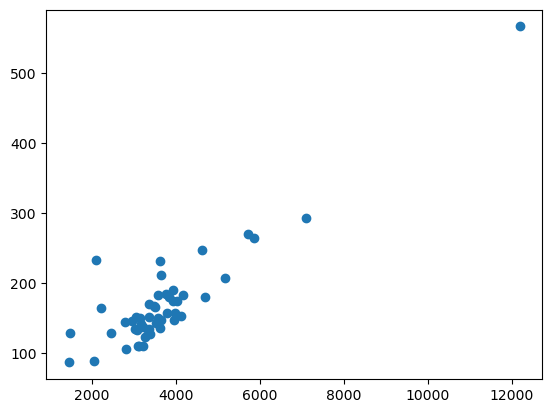

In [27]:
plt.scatter(df[' Taxes'], df['Sell']);

Build Model

In [34]:
y = df['Sell']
x = df[' Taxes']
x = sm.add_constant(x)
x.head()

,const,Taxes
0,1.0,3167
1,1.0,4033
2,1.0,1471
3,1.0,3204
4,1.0,3613


In [29]:
model = sm.OLS(y, x).fit()

Taxes is a good predictor for Sell because: 
- The R-squared of 0.809 represents the proportion of the variance in the dependent variable that is explained by the independent variable. So, 80.9% of the variability in Sell can be explained by Taxes
- As we can see in the model output, the p-value of the Taxes coefficientt is 0.000 and the coefficient value is 0.0414, meaning that for every unit increase in Taxes, Sell increases 0.0414.
- The F-statistic of 203.1 is highly significant with a p-value < 0.001, indicating that the model is statistically significant.
- The RMSE between the predicted values and the actual values is low (31.49) showing that the predicted values are closer to the actual values, on average

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           7.22e-19
Time:                        18:08:25   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
 Taxes         0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
np.sqrt(((y-model.predict(x)) ** 2).mean())

31.492964512226575

In [32]:
model.predict(x)

0     148.033175
1     183.898563
2      77.793340
3     149.565530
4     166.504264
5     142.276490
6     146.542235
7     230.490434
8     253.020193
9     101.938283
10    187.791572
11     76.716550
12    103.304978
13    133.579341
14    179.094423
15    108.813173
16    161.741539
17    166.255774
18    167.953789
19    164.350684
20    210.735481
21    310.421379
22    161.078899
23    179.218668
24    189.241097
25    173.627643
26    145.382615
27    156.150514
28    521.803524
29    175.532733
30    164.474929
31    172.799343
32    156.067684
33    180.461118
34    143.394695
35    139.046121
36    155.446460
37    154.949480
38    259.273857
39    181.786398
40    156.606079
41    146.045255
42    152.216090
43    167.953789
44    132.129816
45    117.841642
46    163.025404
47    208.457656
48    149.606945
49    143.560355
dtype: float64

Now we will repeat the procedure using Living as the independent variable

In [46]:
y2 = df['Sell']
x2 = df[' Living']
x2 = sm.add_constant(x2)
x2.head()

,const,Living
0,1.0,28
1,1.0,18
2,1.0,13
3,1.0,17
4,1.0,25


In [47]:
model2 = sm.OLS(y2, x2).fit()

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           4.39e-17
Time:                        19:05:35   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.532     -18.749      35.856
 Living        7.6613      0.599     12.796      0.000       6.458       8.865
==============================================================================
Omnibus:                        3.798   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                2.793
Skew:                          -0.399   Prob(JB):                        0.247
Kurtosis:                       3.838   Cond. No.                         62.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
np.sqrt(((y2-model2.predict(x2)) ** 2).mean())

34.292273096827394

In [50]:
model.predict(x2)

0     18.031499
1     17.617349
2     17.410274
3     17.575934
4     17.907254
5     17.617349
6     17.700179
7     17.783009
8     18.114329
9     17.286029
10    17.783009
11    17.534519
12    17.907254
13    17.700179
14    17.783009
15    17.575934
16    17.824424
17    17.658764
18    17.575934
19    17.658764
20    17.865839
21    17.948669
22    17.700179
23    17.783009
24    17.741594
25    17.700179
26    17.534519
27    17.617349
28    19.522439
29    17.700179
30    17.575934
31    17.700179
32    17.575934
33    17.410274
34    17.493104
35    17.534519
36    17.865839
37    17.700179
38    18.362819
39    17.617349
40    17.575934
41    17.493104
42    17.617349
43    18.487064
44    17.617349
45    17.286029
46    17.741594
47    18.072914
48    17.493104
49    17.948669
dtype: float64

Living is a moderately good predictor for Sell because: 
- The R-squared of 0.773 represents the proportion of the variance in the dependent variable that is explained by the independent variable. So, 77.3% of the variability in Sell can be explained by Living, which is decent
- The F-statistic of 163.7 is statistically significant with a p-value < 0.001, indicating that the model as a whole is statistically significant. 
- The RMSE between the predicted values and the actual values is very similar to what it was for Taxes (31.49 for taxes vs 34.29 for living) showing that the predicted values are also close to the actual values, on average